In [ ]:
# equity option ticker and bond future price ticker has to be used in place of equity and bond ticker
!pip install arch
!pip install fredapi
import yfinance as yf
from arch import arch_model
from arch.__future__ import reindexing
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import datetime

[*********************100%***********************]  1 of 1 completed


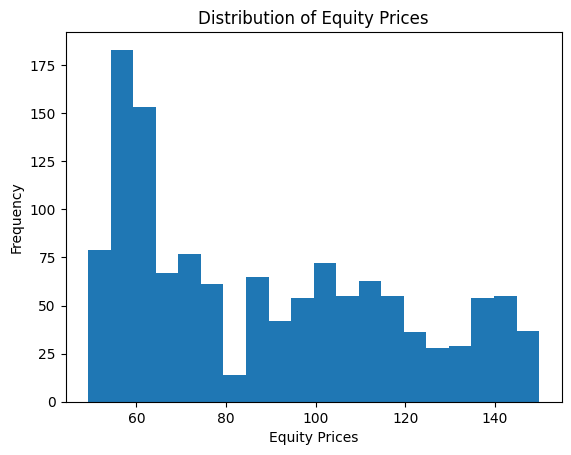

It can be observed from the above graph that stock prices are low in general, 
which implies that lending rate should generally be proportionately lower as well.


In [58]:
ticker = "GOOGL"
equity_data = yf.download(ticker, start="2018-05-01", end="2023-05-31")
equity_prices = equity_data['Close']

plt.hist(equity_prices, bins=20)
plt.xlabel('Equity Prices')
plt.ylabel('Frequency')
plt.title('Distribution of Equity Prices')
plt.show()

print('It can be observed from the above graph that stock prices are low in general, \nwhich implies that lending rate should generally be proportionately lower as well.')

[*********************100%***********************]  1 of 1 completed


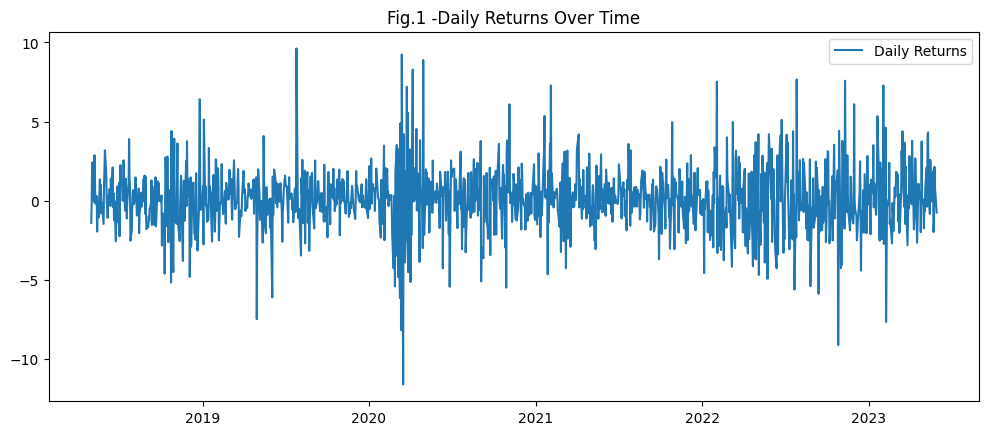



We can see from the above diagram the level of volatility:
Daily volatility: 2.00%
Monthly volatility: 9.17%
Annual volatility: 31.76%


mu          0.122692
omega       0.151276
alpha[1]    0.072157
beta[1]     0.889246
Name: params, dtype: float64


                 h.1       h.2       h.3      h.4       h.5
Date                                                       
2023-05-30  3.237175  3.263506  3.288822  3.31316  3.336559




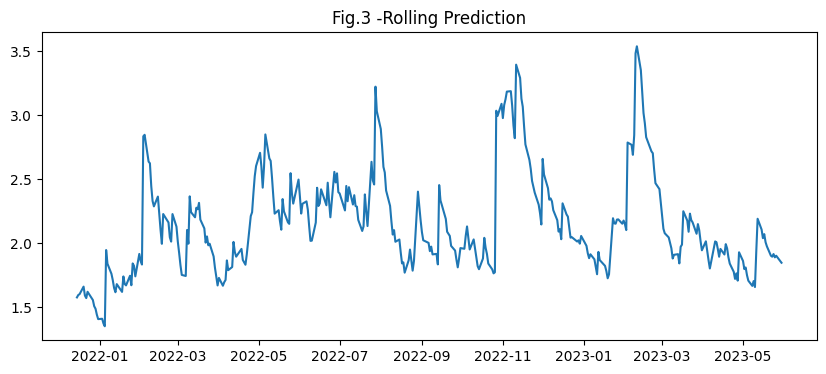

From the above, we can see that the volatile is very high, with an Annual volatility of 31.76%




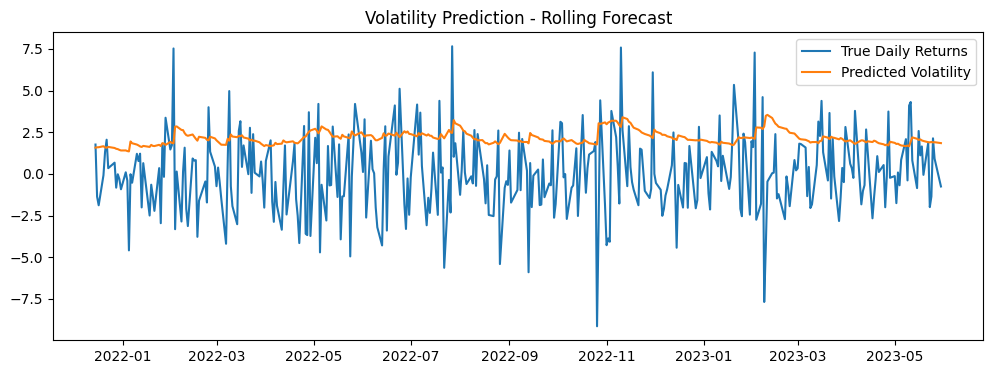

The above shows the combined Daily Volatility v/s. Predicted Volatility


In [ ]:
ticker = "GOOGL"
stock_data = yf.download(ticker, start="2018-05-01", end="2023-05-31")
stock_data['Return'] = 100 * stock_data['Close'].pct_change()
stock_data.dropna(inplace=True)

fig = plt.figure()
fig.set_figwidth(12)
plt.plot(stock_data['Return'], label='Daily Returns')
plt.legend(loc='upper right')
plt.title('Fig.1 -Daily Returns Over Time')
plt.show()

print('\n')

print('We can see from the above diagram the level of volatility:')
daily_volatility = stock_data['Return'].std()
print('Daily volatility: {:.2f}%'.format(daily_volatility))

# Assuming 21 trading days in a month
monthly_volatility = math.sqrt(21) * daily_volatility
print('Monthly volatility: {:.2f}%'.format(monthly_volatility))

# Assuming 252 trading days in a year
annual_volatility = math.sqrt(252) * daily_volatility
print('Annual volatility: {:.2f}%'.format(annual_volatility))

print('\n')

garch_model = arch_model(stock_data['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

gm_result = garch_model.fit(disp='off')
print(gm_result.params)

print('\n')

gm_forecast = gm_result.forecast(horizon = 5)
print(gm_forecast.variance[-1:])

print('\n')

rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = stock_data['Return'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=stock_data['Return'].index[-365:])

plt.figure(figsize=(10,4))
plt.plot(rolling_predictions)
plt.title('Fig.3 -Rolling Prediction')
plt.show()
print('From the above, we can see that the volatile is very high, with an Annual volatility of {:.2f}%'.format(annual_volatility))

print('\n')

plt.figure(figsize=(12,4))
plt.plot(stock_data['Return'][-365:])
plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])
plt.show()
print('The above shows the combined Daily Volatility v/s. Predicted Volatility')

[*********************100%***********************]  1 of 1 completed


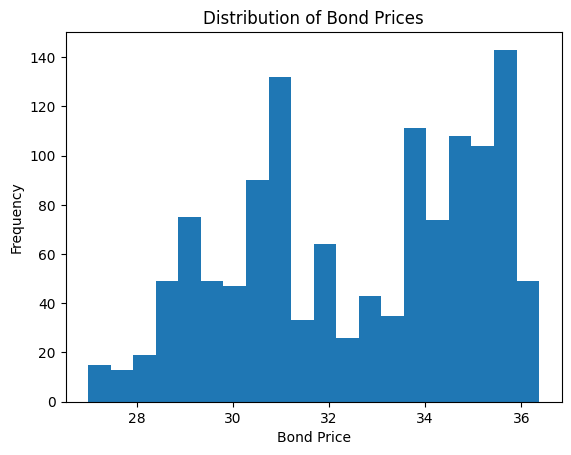


It can be observed from the above graph that bond prices are high in general, 
which implies that lending rate should generally be proportionately higher as well.


In [ ]:
ticker = "SPBO"
bond_data = yf.download(ticker, start="2018-05-01", end="2023-05-31") # 5-year period
bond_prices = bond_data['Close']

plt.hist(bond_prices, bins=20)
plt.xlabel('Bond Price')
plt.ylabel('Frequency')
plt.title('Distribution of Bond Prices')
plt.show()

print('\nIt can be observed from the above graph that bond prices are high in general, \nwhich implies that lending rate should generally be proportionately higher as well.')

[*********************100%***********************]  1 of 1 completed


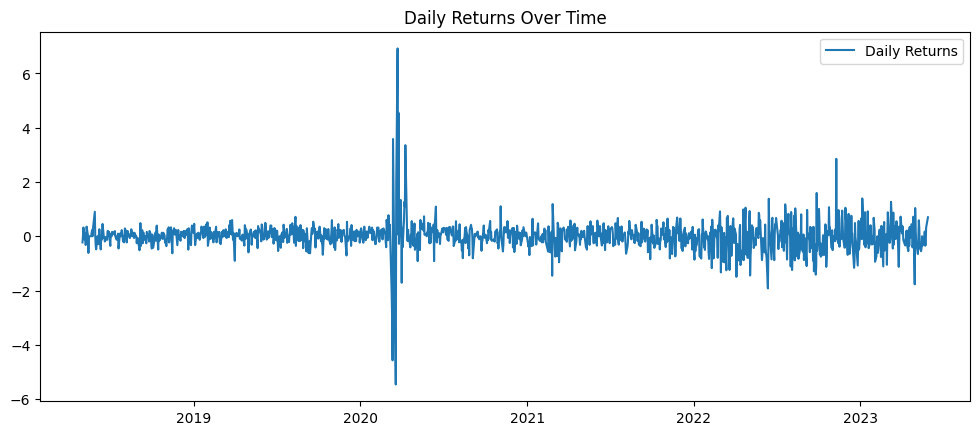



We can see from the above diagram the level of volatility in the bond:
Daily volatility: 0.57%
Monthly volatility: 2.59%
Annual volatility: 8.98%


mu          0.012331
omega       0.003276
alpha[1]    0.134751
beta[1]     0.857745
Name: params, dtype: float64


                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2023-05-30  0.198956  0.200738  0.202507  0.204263  0.206006




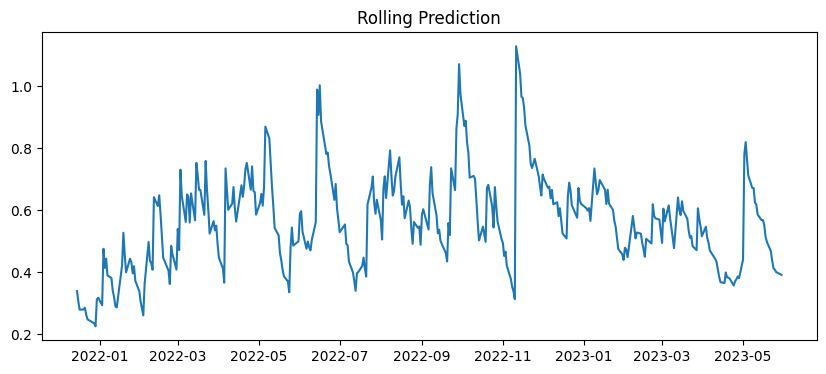

This shows the daily volatility for a 5-year period




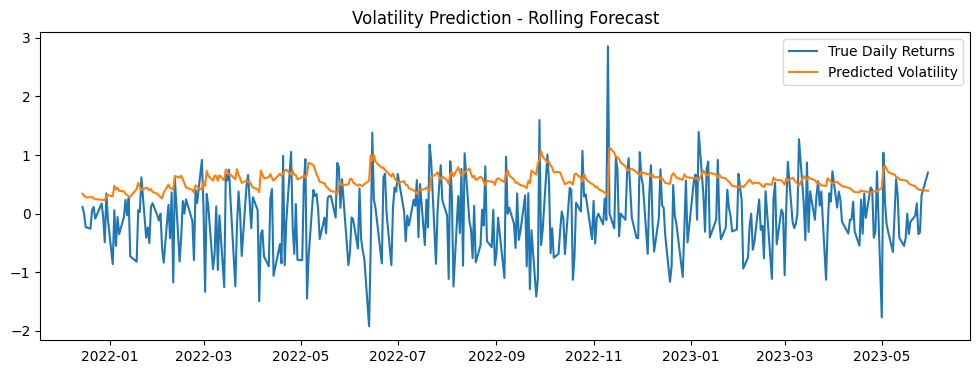

This displays the combined daily volatility v/s. predicted volatility 
The graph showcases the historical movement of bond futures prices- insights into volatility and potential trading opportunities.


In [ ]:
ticker = "SPBO"
stock_data = yf.download(ticker, start="2018-05-01", end="2023-05-31")
stock_data['Return'] = 100 * stock_data['Close'].pct_change()
stock_data.dropna(inplace=True)

fig = plt.figure()
fig.set_figwidth(12)
plt.plot(stock_data['Return'], label='Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')
plt.show()

print('\n')

print('We can see from the above diagram the level of volatility in the bond:')
daily_volatility = stock_data['Return'].std()
print('Daily volatility: {:.2f}%'.format(daily_volatility))

monthly_volatility = math.sqrt(21) * daily_volatility
print('Monthly volatility: {:.2f}%'.format(monthly_volatility))

annual_volatility = math.sqrt(252) * daily_volatility
print('Annual volatility: {:.2f}%'.format(annual_volatility))

print('\n')

garch_model = arch_model(stock_data['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

gm_result = garch_model.fit(disp='off')
print(gm_result.params)

print('\n')

gm_forecast = gm_result.forecast(horizon = 5)
print(gm_forecast.variance[-1:])

print('\n')

rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = stock_data['Return'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

rolling_predictions = pd.Series(rolling_predictions, index=stock_data['Return'].index[-365:])

plt.figure(figsize=(10,4))
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')
plt.show()
print('This shows the daily volatility for a 5-year period')

print('\n')

plt.figure(figsize=(12,4))
plt.plot(stock_data['Return'][-365:])
plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Returns', 'Predicted Volatility'])
plt.show()
print('This displays the combined daily volatility v/s. predicted volatility \nThe graph showcases the historical movement of bond futures prices- insights into volatility and potential trading opportunities.')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


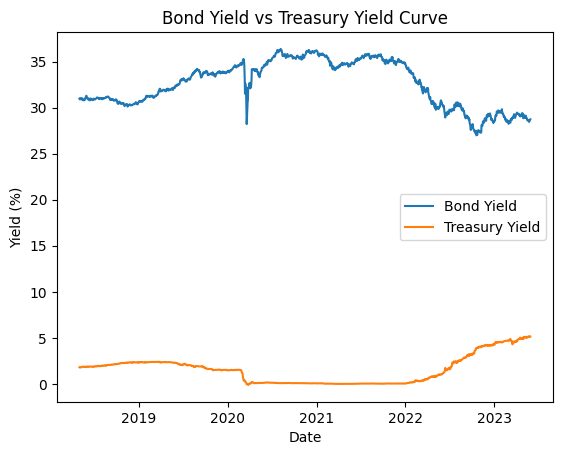

The bond yield is much higher than the treasury yield but also at the cost of much higher volatility


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

bond_ticker = "SPBO"
treasury_ticker = "^IRX"

bond_data = yf.download(bond_ticker, start="2018-05-01", end="2023-05-31")
treasury_data = yf.download(treasury_ticker, start="2018-05-01", end="2023-05-31")

bond_yield = bond_data['Close']
treasury_yield = treasury_data['Close']

plt.plot(bond_yield, label='Bond Yield')
plt.plot(treasury_yield, label='Treasury Yield')
plt.xlabel('Date')
plt.ylabel('Yield (%)')
plt.title('Bond Yield vs Treasury Yield Curve')
plt.legend()
plt.show()
print('The bond yield is much higher than the treasury yield but also at the cost of much higher volatility')

In [ ]:
start = datetime.date(2003,1,1)
end = datetime.date(2023,1,1)

In [ ]:
# API key for FRED
api_key = '5c4994feec34fd5323360089dca5258e'

# Create a Fred object with your API key
fred = Fred(api_key=api_key)

##Construction Loan

In [ ]:
# Importing the historical Charge-Off Rate and delinquency rate of all construction loans of Commercial Banks in US
series_id = ['CORBLACBS','DRCRELEXFACBS']  # Charge-Off Rate, Delinquency Rate series ID

const_loan_df = pd.DataFrame()

# Retrieve and add each series to the DataFrame
for series_id in series_id:
    # Retrieve the data
    data = fred.get_series(series_id, observation_start=start, observation_end=end)

    # Add the data as a new column to the DataFrame
    const_loan_df[series_id] = data


# Print the DataFrame
const_loan_df.rename(columns = {'CORBLACBS':'Charge Off','DRCRELEXFACBS': 'Delinquency' }, inplace = True)
print(const_loan_df)

            Charge Off  Delinquency
2003-01-01        1.65         1.65
2003-04-01        1.41         1.61
2003-07-01        1.29         1.51
2003-10-01        0.83         1.39
2004-01-01        0.80         1.24
...                ...          ...
2022-01-01        0.12         0.73
2022-04-01        0.13         0.72
2022-07-01        0.17         0.65
2022-10-01        0.22         0.69
2023-01-01        0.28         0.76

[81 rows x 2 columns]


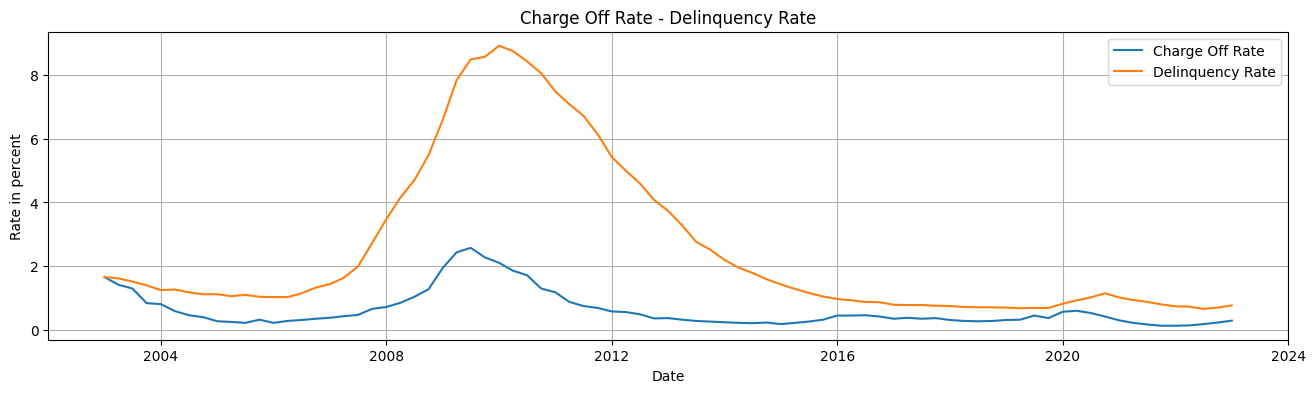

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(const_loan_df['Charge Off'])
plt.plot(const_loan_df['Delinquency'])
plt.title('Charge Off Rate - Delinquency Rate')
plt.legend(['Charge Off Rate', 'Delinquency Rate'])
plt.xlabel('Date')
plt.ylabel('Rate in percent')
plt.grid(True)
plt.show()

We can see that delinquency rate peaked at the 2008 financial crisis. Now we will see ( assuming borrower is JLL which is in construction business) construction market's contribution in overall GDP(Value added to GDP). Then we will find correlation between GDP, interest rate and delinquency rate.


In [ ]:
const_loan_df['Fed Rate'] = fred.get_series('FEDFUNDS', observation_start=start, observation_end=end)
const_loan_df['Value added to GDP'] = fred.get_series('VAPGDPC', observation_start=start, observation_end=end)

const_loan_df

,Charge Off,Delinquency,Fed Rate,Value added to GDP
2003-01-01,1.65,1.65,1.24,NaN
2003-04-01,1.41,1.61,1.26,NaN
2003-07-01,1.29,1.51,1.01,NaN
2003-10-01,0.83,1.39,1.01,NaN
2004-01-01,0.80,1.24,1.00,NaN
...,...,...,...,...
2022-01-01,0.12,0.73,0.08,4.0
2022-04-01,0.13,0.72,0.33,3.9
2022-07-01,0.17,0.65,1.68,3.9
2022-10-01,0.22,0.69,3.08,4.0


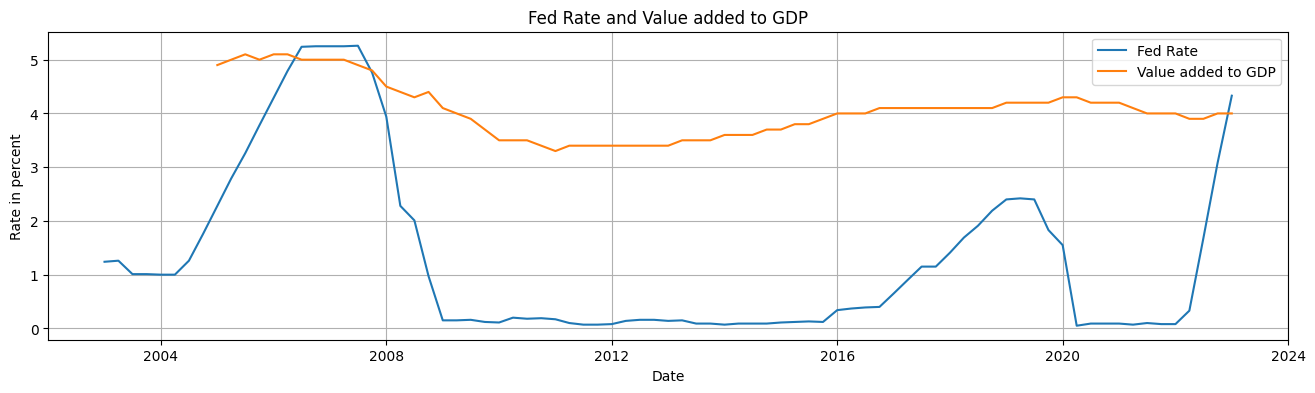

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(const_loan_df['Fed Rate'])
plt.plot(const_loan_df['Value added to GDP'])
plt.title('Fed Rate and Value added to GDP')
plt.legend(['Fed Rate', 'Value added to GDP'])
plt.xlabel('Date')
plt.ylabel('Rate in percent')
plt.grid(True)
plt.show()

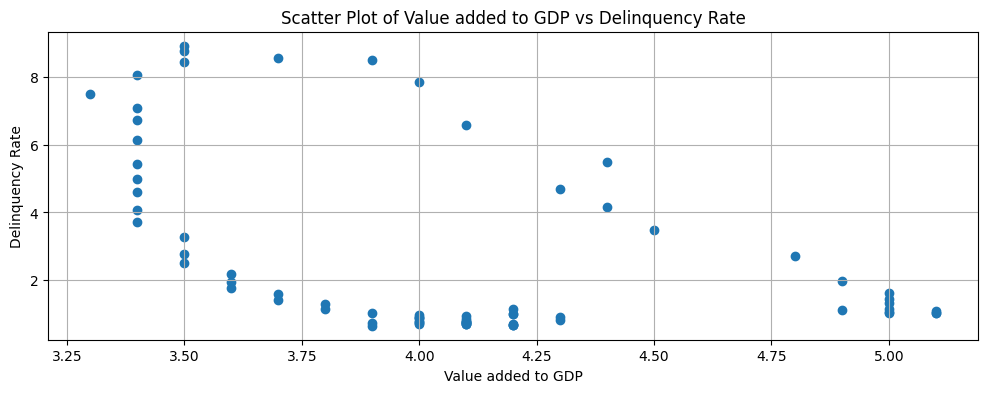

In [ ]:
#Correlation between fed rate, Value added to GDP and delinquency rate using scatter plot and correlation matrix.
plt.figure(figsize=(12,4))
plt.scatter(const_loan_df['Value added to GDP'], const_loan_df['Delinquency'])
plt.title('Scatter Plot of Value added to GDP vs Delinquency Rate')
plt.xlabel('Value added to GDP')
plt.ylabel('Delinquency Rate')
plt.grid(True)
plt.show()

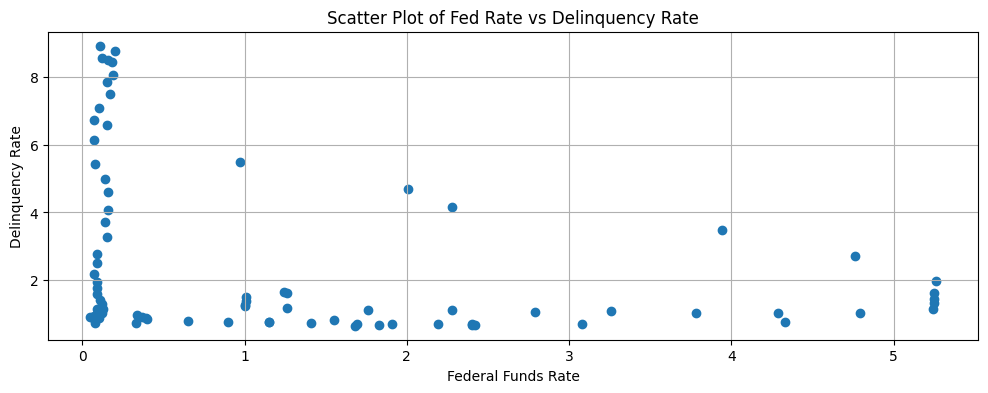

In [ ]:
plt.figure(figsize=(12,4))
plt.scatter(const_loan_df['Fed Rate'], const_loan_df['Delinquency'])
plt.title('Scatter Plot of Fed Rate vs Delinquency Rate')
plt.xlabel('Federal Funds Rate')
plt.ylabel('Delinquency Rate')
plt.grid(True)
plt.show()

In [ ]:
df = const_loan_df[['Delinquency', 'Value added to GDP','Fed Rate']]

corr_matrix = df.corr()
corr_matrix

,Delinquency,Value added to GDP,Fed Rate
Delinquency,1.000000,-0.48345,-0.325803
Value added to GDP,-0.483450,1.00000,0.820660
Fed Rate,-0.325803,0.82066,1.000000


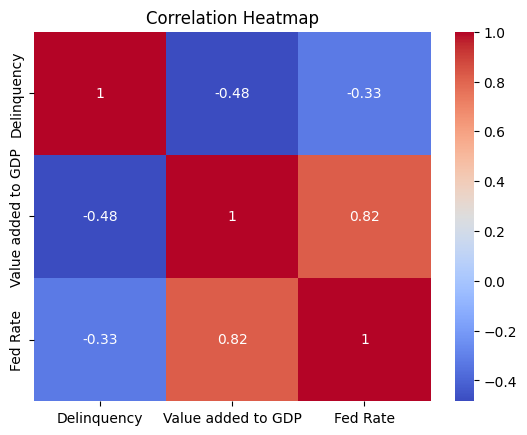

In [ ]:
# Heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

We can see that there is moderate negative correlation between delinquency rate and value added to GDP where as it is weak negative correlation between delinquency and fed rates. But there is strong correlation between fed rate and value added to GDP. So, indirectly fed rate has impact on delinquency. Increase in fed rate increaes value added to GDP which there by reduces the delinquency as they are negatively correlated.

Now we look at financial health of Jones Lang LaSalle Incorporated (JLL) in the form of fundamental ratios like debt to equity, current ratio and debt to asset ratio.

###JLL Financial Ratios

In [ ]:
# Ticker symbol for JLL
ticker = "JLL"

# Get JLL's financial data from Yahoo Finance
jll = yf.Ticker(ticker)

# balance sheet data
balance_sheet = jll.balance_sheet
print(balance_sheet,'\n')
# total debt and total equity from the balance sheet
total_debt = balance_sheet.loc["Total Debt"].iloc[0]
total_equity = balance_sheet.loc["Total Equity Gross Minority Interest"].iloc[0]

# the debt-to-equity ratio
debt_to_equity = total_debt / total_equity

print("Debt-to-Equity Ratio:", debt_to_equity)

# the total debt and total assets from the balance sheet
total_debt = balance_sheet.loc["Total Debt"].iloc[0]
total_assets = balance_sheet.loc["Total Assets"].iloc[0]

# the debt-to-asset ratio
debt_to_asset_ratio = total_debt / total_assets

print("Debt-to-Asset Ratio:", debt_to_asset_ratio)

# the current assets and current liabilities from the balance sheet
current_assets = balance_sheet.loc["Current Assets"].iloc[0]
current_liabilities = balance_sheet.loc["Current Liabilities"].iloc[0]

# the current ratio
current_ratio = current_assets / current_liabilities

print("Current Ratio:", current_ratio)

                                                    2022-12-31    2021-12-31  \
Treasury Shares Number                               4578210.0     2052661.0   
Ordinary Shares Number                              47507758.0    50024139.0   
Share Issued                                        52085968.0    52076800.0   
Net Debt                                          1686800000.0  1158400000.0   
Total Debt                                        3138300000.0  2620300000.0   
...                                                        ...           ...   
Accounts Receivable                               2148800000.0  2004100000.0   
Allowance For Doubtful Accounts Receivable         -66700000.0   -67600000.0   
Gross Accounts Receivable                         2215500000.0  2071700000.0   
Cash Cash Equivalents And Short Term Investments   519300000.0   593700000.0   
Cash And Cash Equivalents                          519300000.0   593700000.0   

                                       

In [ ]:
Debt_to_Equity = []
Debt_to_Asset = []
Current_Ratio = []
Year = ['2022-12-31',	'2021-12-31',	'2020-12-31',	'2019-12-31']
for i in range (4):
    # total debt and total equity from the balance sheet
    total_debt = balance_sheet.loc["Total Debt"].iloc[i]
    total_equity = balance_sheet.loc["Total Equity Gross Minority Interest"].iloc[i]

    # the debt-to-equity ratio
    debt_to_equity = total_debt / total_equity
    Debt_to_Equity.append(debt_to_equity)


    # the total debt and total assets from the balance sheet
    total_debt = balance_sheet.loc["Total Debt"].iloc[i]
    total_assets = balance_sheet.loc["Total Assets"].iloc[i]

    # the debt-to-asset ratio
    debt_to_asset_ratio = total_debt / total_assets
    Debt_to_Asset.append(debt_to_asset_ratio)


    # the current assets and current liabilities from the balance sheet
    current_assets = balance_sheet.loc["Current Assets"].iloc[i]
    current_liabilities = balance_sheet.loc["Current Liabilities"].iloc[i]

    # the current ratio
    current_ratio = current_assets / current_liabilities
    Current_Ratio.append(current_ratio)

data = {
    'Debt_to_Equity':Debt_to_Equity,
    'Debt_to_Asset':Debt_to_Asset,
    'Current_Ratio':Current_Ratio
}
Funda_ratio_JLL = pd.DataFrame(data, index= Year)
Funda_ratio_JLL.index.name = 'Date'

In [ ]:
Funda_ratio_JLL

,Debt_to_Equity,Debt_to_Asset,Current_Ratio
Date,,,
2022-12-31,0.510334,0.201254,1.111230
2021-12-31,0.408070,0.168997,0.984768
2020-12-31,0.552405,0.216764,1.053184
2019-12-31,0.521340,0.198784,1.068923


As we can see annual debt to equity ratio for the past four years is in the range of 51-55%,with it dropping to 41% percent approx. in 4th quarter of 2021, which makes lending to JLL relative safe and less risky. It tell us JLL is financially healthy. Similarly, JLL's debt to asset ratio is quite small which again makes it financialy sound as it has much more asset compared to its debt obligations. Finally, the current ratio is also greater than 1 in the past 4 years except in 2021 last quarter. It means the company is well equipped to handle short term debt obligations. So, over all from lendiing point view, it is quite safe to give loan to JLL at a favourable rate as the probability of default based on above factor is low.

###Colgate-Palmolive(CL) Financial Ratios

In [ ]:
# Ticker symbol for JLL
ticker = "CL"

# Get JLL's financial data from Yahoo Finance
cl = yf.Ticker(ticker)

# balance sheet data
balance_sheet = cl.balance_sheet
print(balance_sheet,'\n')
# total debt and total equity from the balance sheet
total_debt = balance_sheet.loc["Total Debt"].iloc[0]
total_equity = balance_sheet.loc["Total Equity Gross Minority Interest"].iloc[0]

# the debt-to-equity ratio
debt_to_equity = total_debt / total_equity

print("Debt-to-Equity Ratio:", debt_to_equity)

# the total debt and total assets from the balance sheet
total_debt = balance_sheet.loc["Total Debt"].iloc[0]
total_assets = balance_sheet.loc["Total Assets"].iloc[0]

# the debt-to-asset ratio
debt_to_asset_ratio = total_debt / total_assets

print("Debt-to-Asset Ratio:", debt_to_asset_ratio)

# the current assets and current liabilities from the balance sheet
current_assets = balance_sheet.loc["Current Assets"].iloc[0]
current_liabilities = balance_sheet.loc["Current Liabilities"].iloc[0]

# the current ratio
current_ratio = current_assets / current_liabilities

print("Current Ratio:", current_ratio)

                                                    2022-12-31    2021-12-31  \
Treasury Shares Number                             635493754.0   625226076.0   
Ordinary Shares Number                             830212606.0   840480284.0   
Share Issued                                      1465706360.0  1465706360.0   
Net Debt                                          7991000000.0  6413000000.0   
Total Debt                                        8766000000.0  7245000000.0   
...                                                        ...           ...   
Accounts Receivable                               1504000000.0  1297000000.0   
Allowance For Doubtful Accounts Receivable         -70000000.0   -78000000.0   
Gross Accounts Receivable                         1574000000.0  1375000000.0   
Cash Cash Equivalents And Short Term Investments   775000000.0   832000000.0   
Cash And Cash Equivalents                          775000000.0   832000000.0   

                                       

In [ ]:
Debt_to_Equity = []
Debt_to_Asset = []
Current_Ratio = []
Year = ['2022-12-31',	'2021-12-31',	'2020-12-31',	'2019-12-31']
for i in range (4):
    # total debt and total equity from the balance sheet
    total_debt = balance_sheet.loc["Total Debt"].iloc[i]
    total_equity = balance_sheet.loc["Total Equity Gross Minority Interest"].iloc[i]

    # the debt-to-equity ratio
    debt_to_equity = total_debt / total_equity
    Debt_to_Equity.append(debt_to_equity)


    # the total debt and total assets from the balance sheet
    total_debt = balance_sheet.loc["Total Debt"].iloc[i]
    total_assets = balance_sheet.loc["Total Assets"].iloc[i]

    # the debt-to-asset ratio
    debt_to_asset_ratio = total_debt / total_assets
    Debt_to_Asset.append(debt_to_asset_ratio)


    # the current assets and current liabilities from the balance sheet
    current_assets = balance_sheet.loc["Current Assets"].iloc[i]
    current_liabilities = balance_sheet.loc["Current Liabilities"].iloc[i]

    # the current ratio
    current_ratio = current_assets / current_liabilities
    Current_Ratio.append(current_ratio)

data = {
    'Debt_to_Equity':Debt_to_Equity,
    'Debt_to_Asset':Debt_to_Asset,
    'Current_Ratio':Current_Ratio
}
Funda_ratio_CL = pd.DataFrame(data, index= Year)
Funda_ratio_CL.index.name = 'Date'

In [ ]:
Funda_ratio_CL

,Debt_to_Equity,Debt_to_Asset,Current_Ratio
Date,,,
2022-12-31,10.875931,0.557244,1.284996
2021-12-31,7.461380,0.481715,1.099250
2020-12-31,6.903724,0.477450,1.048586
2019-12-31,14.062724,0.521950,0.367514


As we can see annual debt to equity ratio for the past four years is quite high which show most of the assets are financed by taking huge debt that is leveraged which makes lending to CL relative unsafe and risky. It tell us CL's revenue will be utilised to make interest and principal payments. Similarly, CL's debt to asset ratio is on the higher side which again makes it financialy riskier as it has less asset compared to its debt obligations. Finally, the current ratio is also greater than 1 in the past 4 years except in 2019 last quarter when because of current debt obligation it fell to 37%. It means the company is well equipped to handle short term debt obligations. So, over all from lendiing point view, it is quite isky to give loan to CL as the probability of default based on above factors is high compared to JLL.